In [1]:
from utilities import transform_data, transform_data_lab3
from plot_graphics import plot_grid_search, roc_auc_plot, draw_tree, draw_super_puper_plot, draw_rmse_regression, draw_rmse_regression_leafs

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, r2_score

import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

#### Подготовим тестовые данные из лабораторной №2

In [2]:
train_df1 = pd.read_csv('data_lab2/train.csv', sep=',', header=0,
                        index_col=False)
lab2_cat = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
lab2_num = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
            'Fare']

In [3]:
train_df1 = transform_data(train_df1, lab2_num, lab2_cat, 2)

In [4]:
train_df1.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,534.000000,534.000000,534.00000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.391386,0.663858,0.64794,0.371441,0.068586,0.063358,0.063983,1.518727
std,0.488518,0.419757,0.47806,0.171879,0.150849,0.136560,0.101894,0.797878
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.00000,0.258608,0.000000,0.000000,0.015412,1.000000
50%,0.000000,1.000000,1.00000,0.359135,0.000000,0.000000,0.025374,2.000000
75%,1.000000,1.000000,1.00000,0.464690,0.125000,0.000000,0.061045,2.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000


#### Подготовим тестовые данные из лабораторной №3

In [5]:
train_df2 = pd.read_csv('data_lab3/train.csv')
train_df2.drop("id", axis=1, inplace=True)

In [6]:
train_df2.describe(include='all')

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


### Модельки

#### Классификация

In [7]:
all_cols = train_df1.columns[1:]
x = train_df1[all_cols]
y = train_df1['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=0)

Best Params: {'max_depth': 3, 'max_leaf_nodes': None, 'splitter': 'best'}


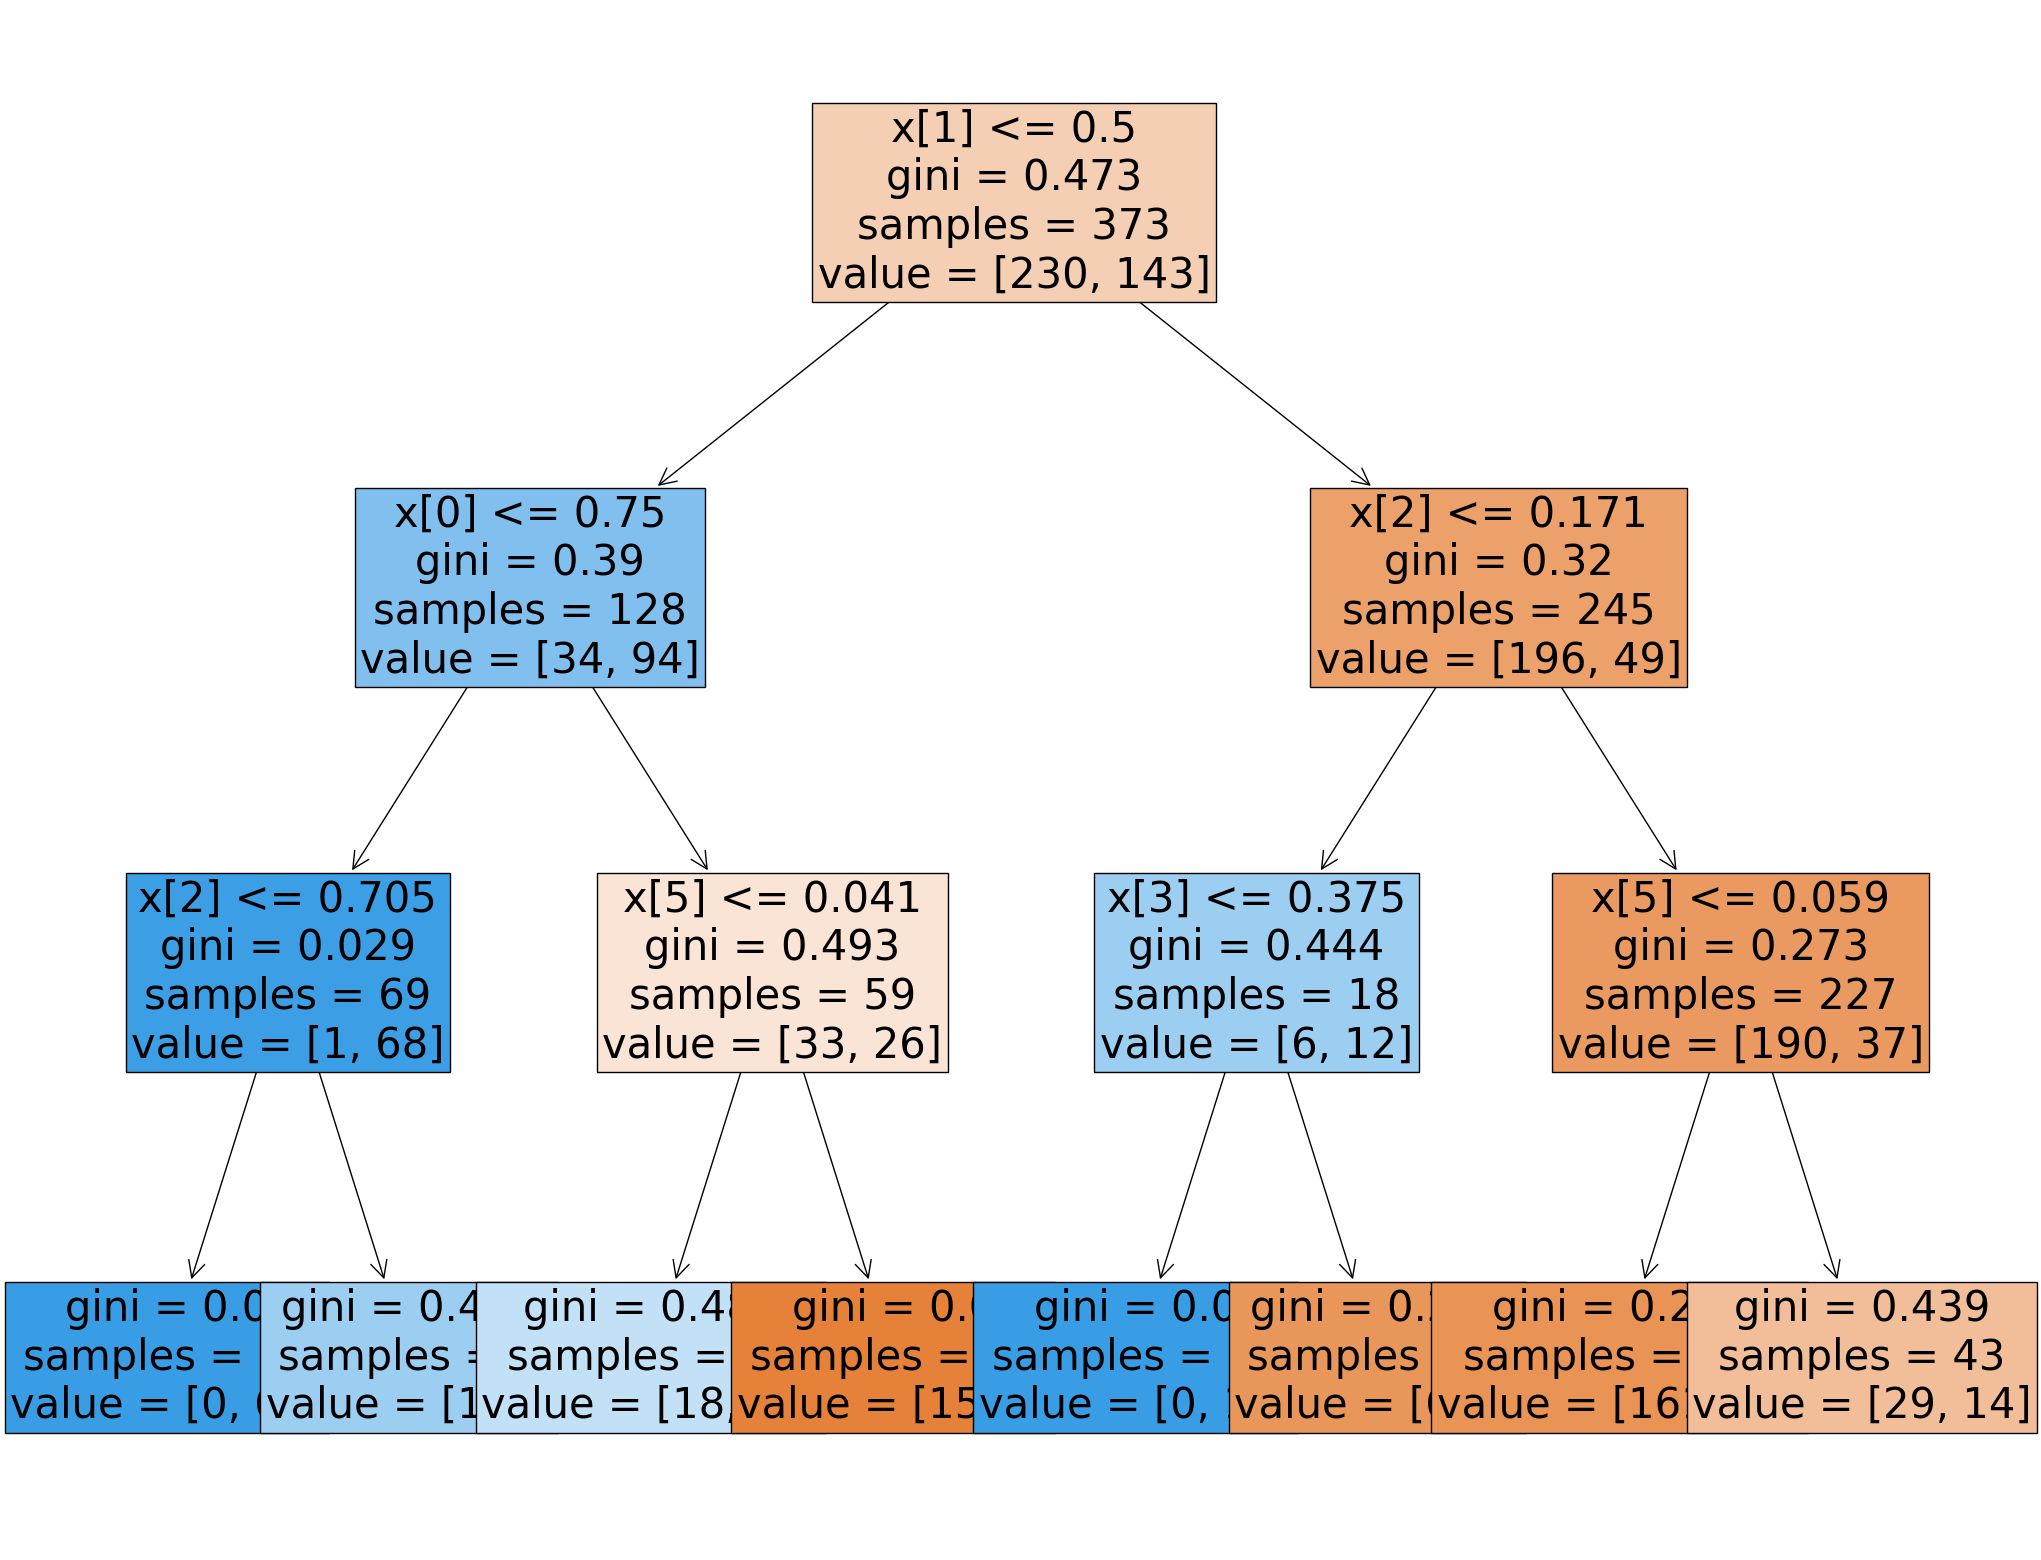

In [8]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [None, *list(range(1, 5))],
    'max_leaf_nodes': [None, *list(range(1, 5))],
    # 'min_samples_split': list(range(2, 5)),
    # 'min_samples_leaf': list(range(1, 5)),
}

class_tree = DecisionTreeClassifier()
grid = GridSearchCV(class_tree, param_grid)
grid.fit(x_train, y_train)
y_test_pred = grid.predict_proba(x_test)[:, 1]
tree_class_auc = roc_auc_score(y_test, y_test_pred)
print(f'Best Params: {grid.best_params_}')
draw_tree(grid.best_estimator_)

In [9]:
y_pred_train = grid.predict_proba(x_train)[:, 1]
y_pred_test = grid.predict_proba(x_test)[:, 1]

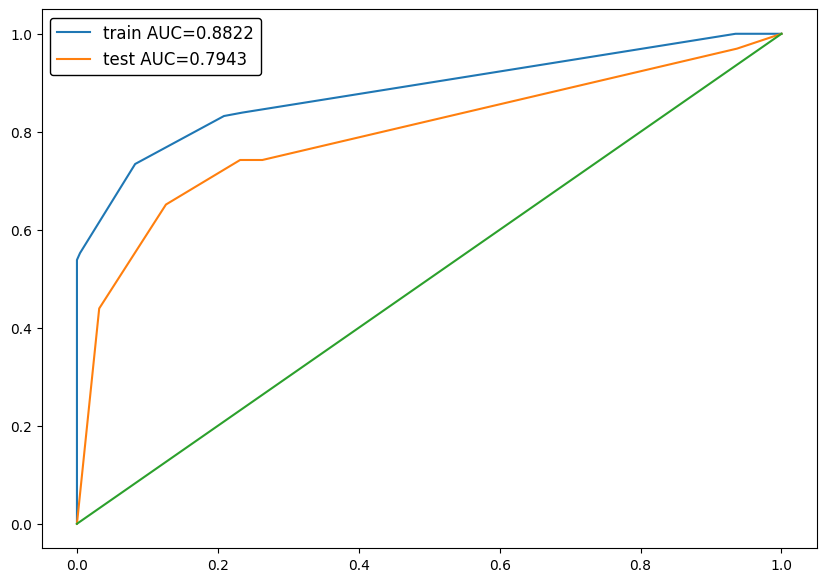

In [10]:
roc_auc_plot(y_train, y_pred_train, y_test, y_pred_test)

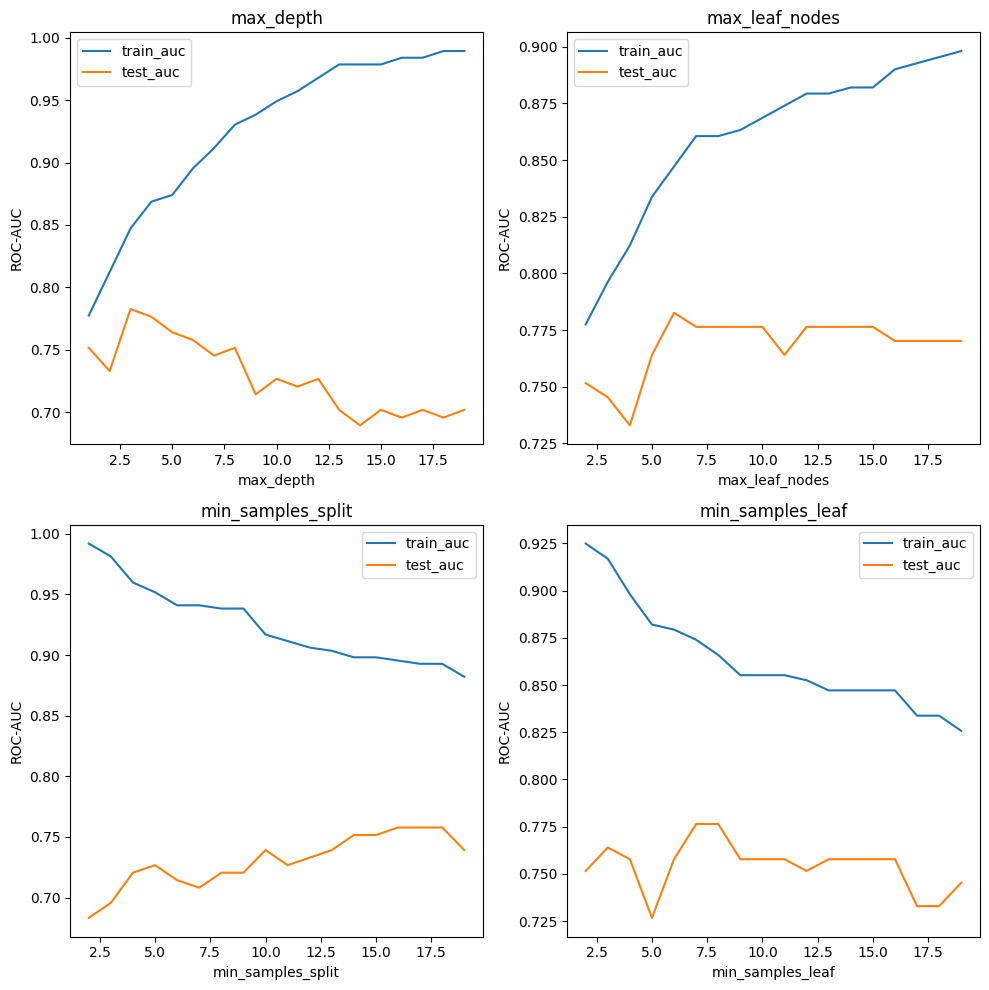

In [11]:
plot_grid_search(DecisionTreeClassifier, x_train, y_train, x_test, y_test, {
    'max_depth': [None, *list(range(1, 20))],
    'max_leaf_nodes': [None, *list(range(2, 20))],
    'min_samples_split': list(range(2, 20)),
    'min_samples_leaf': list(range(2, 20)),
})

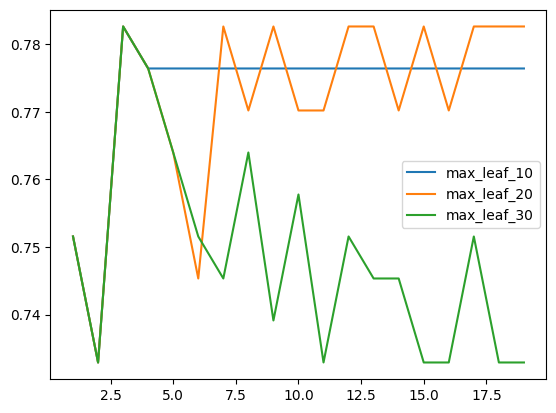

In [12]:
draw_super_puper_plot(DecisionTreeClassifier, x_train, y_train, x_test, y_test,
                      20)

#### Регрессия

In [13]:
x, y = transform_data_lab3(train_df2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=0)

0.8476064275620284
Best Params: {'criterion': 'poisson', 'max_depth': 4, 'max_leaf_nodes': None, 'splitter': 'best'}


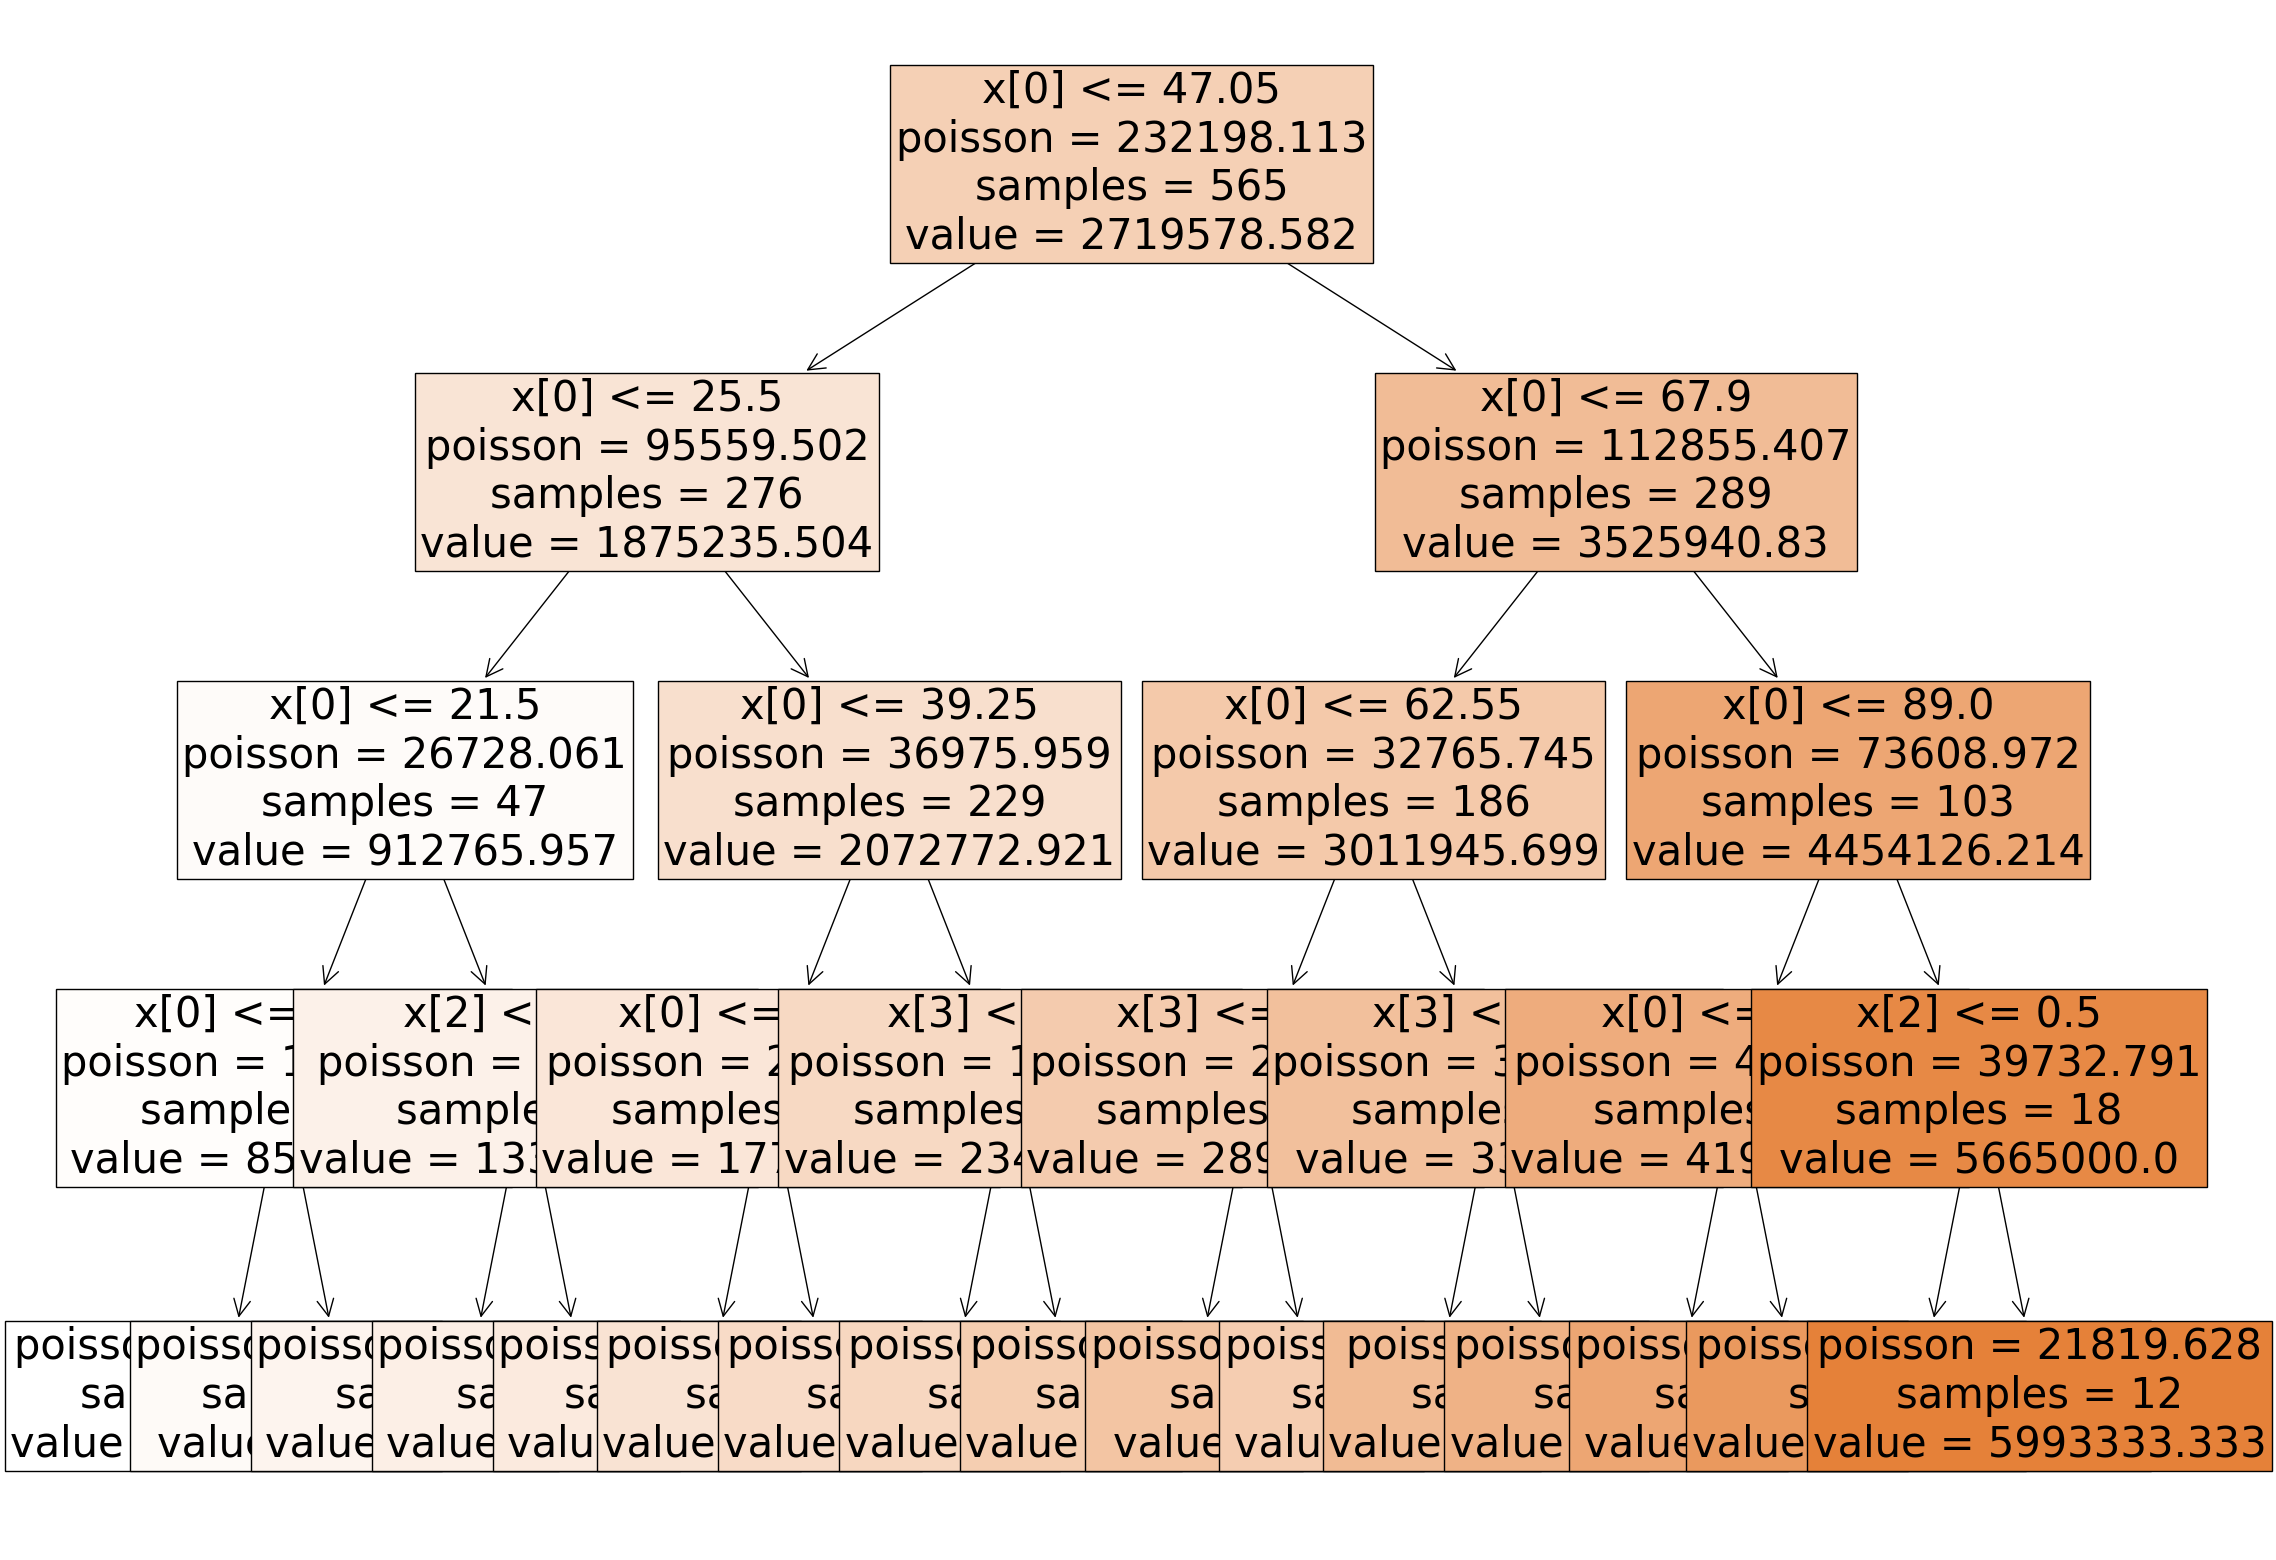

In [14]:
param_grid = {
    'splitter': ['best', 'random'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error',
                  'poisson'],
    'max_depth': [None, *list(range(1, 5))],
    'max_leaf_nodes': [None, *list(range(1, 5))],
    # 'min_samples_split': list(range(2, 5)),
    # 'min_samples_leaf': list(range(1, 5)),
}

class_tree = DecisionTreeRegressor()
grid = GridSearchCV(class_tree, param_grid, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
# tree_reg_rmse = mean_squared_error(y_test, y_pred, squared=True)
tree_reg_rmse = r2_score(y_test, y_pred)
print(tree_reg_rmse)
print(f'Best Params: {grid.best_params_}')
draw_tree(grid.best_estimator_)

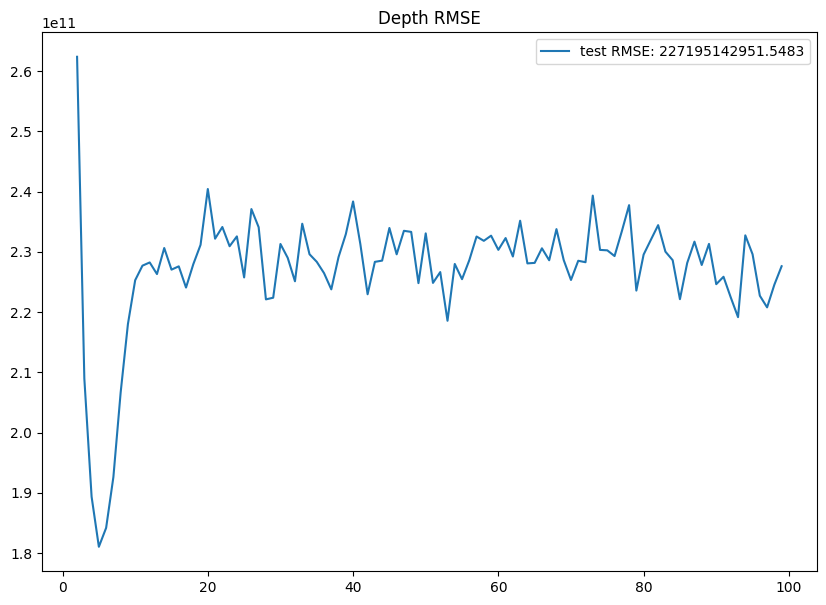

In [15]:
draw_rmse_regression(DecisionTreeRegressor, x_train, y_train, x_test, y_test)

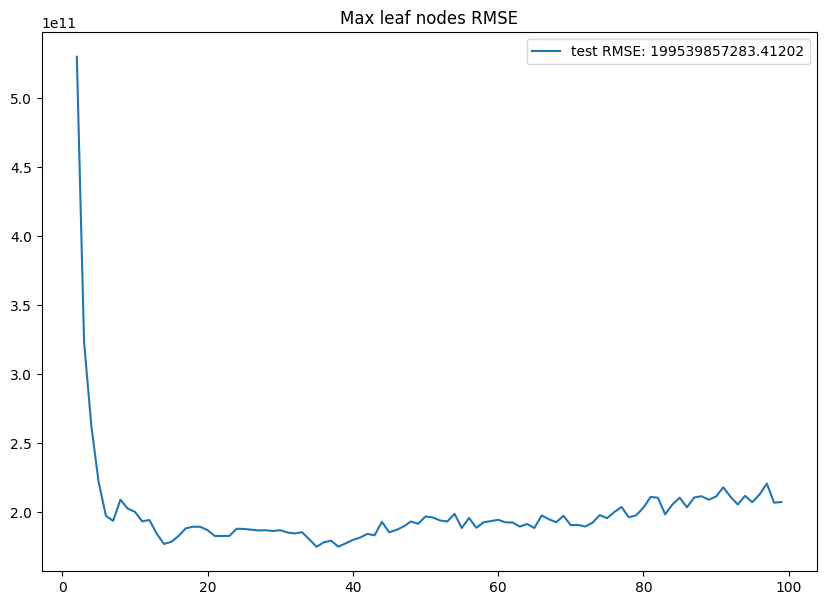

In [16]:
draw_rmse_regression_leafs(DecisionTreeRegressor, x_train, y_train, x_test, y_test)

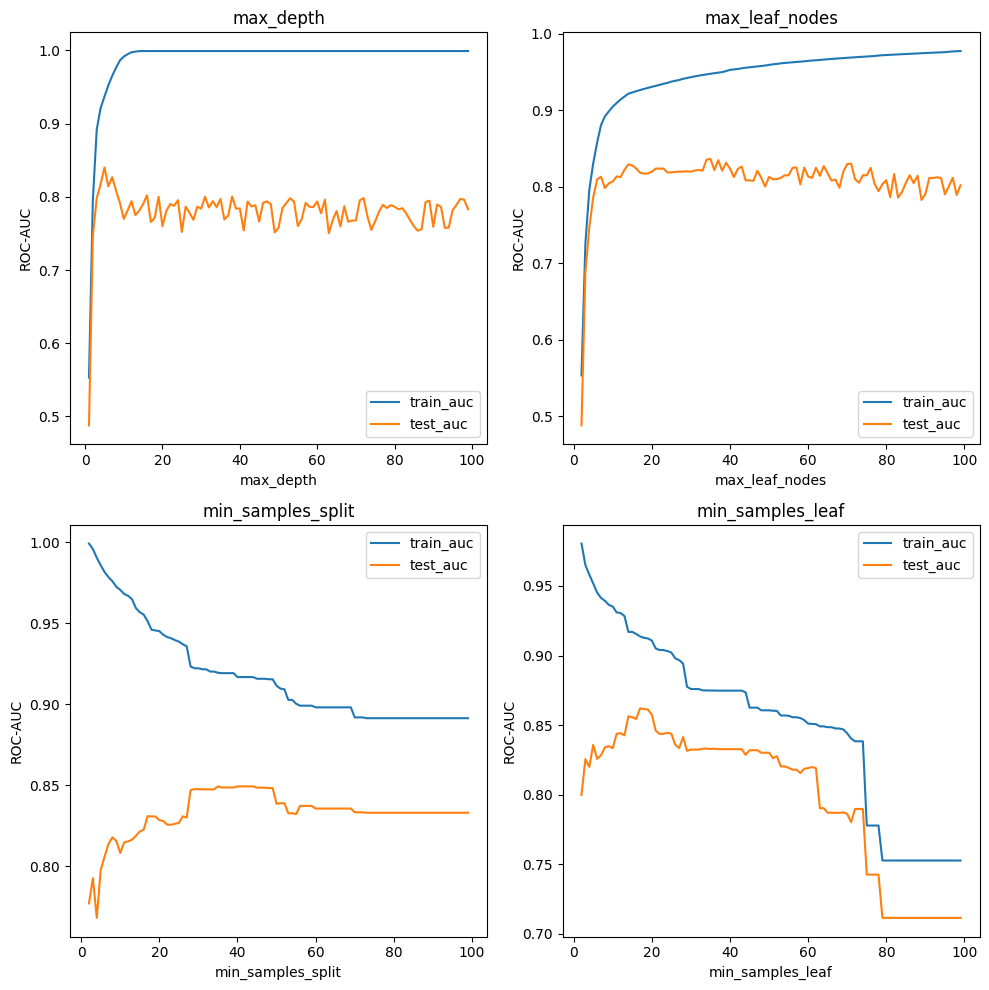

In [17]:
plot_grid_search(DecisionTreeRegressor, x_train, y_train, x_test, y_test, {
    'max_depth': [None, *list(range(1, 100))],
    'max_leaf_nodes': [None, *list(range(2, 100))],
    'min_samples_split': list(range(2, 100)),
    'min_samples_leaf': list(range(2, 100)),
})

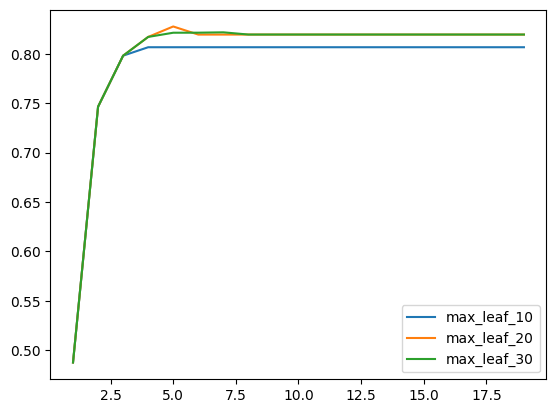

In [18]:
draw_super_puper_plot(DecisionTreeRegressor, x_train, y_train, x_test, y_test, 20)

#### Сравнение модели дерева классификации с моделями из лабораторной №2

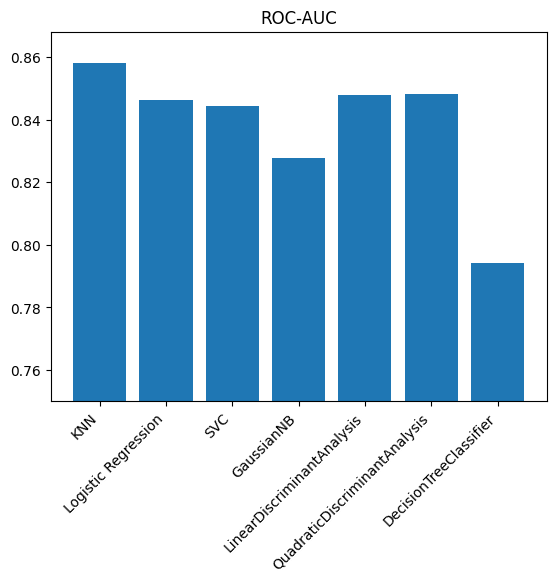

In [19]:
classifications = {'KNN': 0.8580721466587818,
                   'Logistic Regression': 0.8461265523358958,
                   'SVC': 0.8443524541691307, 'GaussianNB': 0.8276759314015376,
                   'LinearDiscriminantAnalysis': 0.8479006505026613,
                   'QuadraticDiscriminantAnalysis': 0.8482554701360142}
classifications.update({'DecisionTreeClassifier': tree_class_auc})

plt.bar(classifications.keys(), classifications.values())
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim([0.75,
                    max(classifications.values()) + 0.01])  # задаем пределы оси Y, чтобы она начиналась с 0.75
plt.title('ROC-AUC')
plt.show()

0.8476064275620284


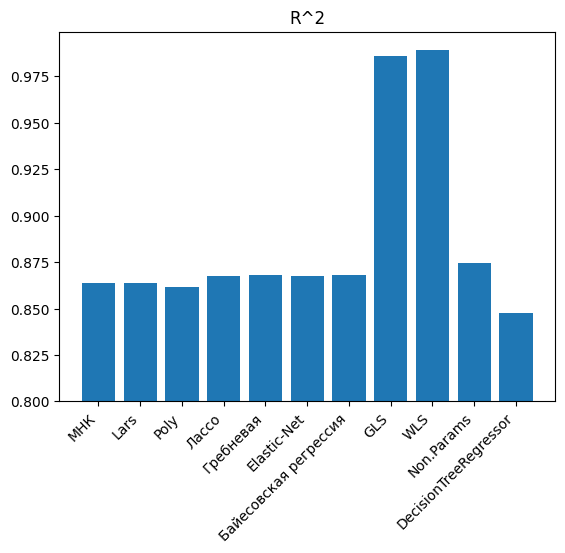

In [20]:
regressions_rmse = {
    'МНК': 0.863567,
    'Lars': 0.863567,
    'Poly': 0.861733,
    'Лассо': 0.867668,
    'Гребневая': 0.867952,
    'Elastic-Net': 0.867669,
    'Байесовская регрессия': 0.868259,
    'GLS': 0.986,
    'WLS': 0.989,
    'Non.Params': 0.8746651412735535
}
regressions_rmse.update({'DecisionTreeRegressor': tree_reg_rmse})
print(tree_reg_rmse)

plt.bar(regressions_rmse.keys(), regressions_rmse.values())
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim([0.80, max(regressions_rmse.values()) + 0.01])
plt.title('R^2')
plt.show()